In [1]:
import pandas as pd
import sys
#sys.path.append('../modeling/')
#from svm_constructiveness_classification import ConstructivenessClassifier
sys.path.append('../../')
from config import Config
from experiments_utils import *

In [2]:
training_feats_file = Config.TRAIN_PATH + 'SOCC_nyt_ync_features.csv'

In [3]:
training_feats_df = pd.read_csv(training_feats_file)

In [4]:
data_sources = ['SOCC', 
                #'NYTPicks+YNACC', 
                #'SOCC+NYTPicks+YNACC', 
                #'SOCC+NYTPicks'
               ]        

Data source:  SOCC
Size of the training data:  12000 	Concstructive ( 5906 ) 	Non concstructive ( 6094 )
plot learning cures:  
Show the plots


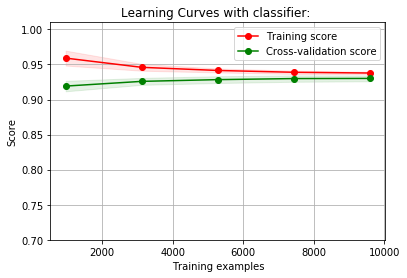


----------------------------



In [11]:
for data_source in data_sources:
    print('Data source: ', data_source) 
    sources = data_source.split('+')

    if data_source.startswith('SOCC+NYTPicks'):
        # sample negative examples from SOCC and the same number of +ve examples from NYTPicks
        subset_df = training_feats_df[training_feats_df['source'].isin(sources)]
        SOCC_neg_df = subset_df[(subset_df['source'] == 'SOCC') & (subset_df['constructive'] == 0)]
        NYTPicks_df = subset_df[(subset_df['source'] == 'NYTPicks')]                        
        NYTPicks_df_sample = NYTPicks_df.sample(n = SOCC_neg_df.shape[0])
        train_df = pd.concat([SOCC_neg_df, NYTPicks_df_sample])    
    else:             
        train_df = training_feats_df[training_feats_df['source'].isin(sources)]        

    feature_set = [
                   'text_feats',
                   'argumentation_feats',
                   'COMMENTIQ_feats',
                   'named_entity_feats',
                   'constructiveness_chars_feats', 
                   'non_constructiveness_chars_feats']
    #print('Cross-validation results: ', run_cross_validation_experiments(train_df, feature_set))
    save_path = data_source + '.png'
    run_training_size_experiments(train_df, feature_set, save_path)

    print('\n----------------------------\n')          